

## 👨‍💼  By: Mohit Yadav

# 🎯 Customer Satisfaction Prediction Using Machine Learning

This project builds an end-to-end machine learning pipeline to analyze and predict customer satisfaction (CSAT) scores based on historical customer support interaction data. From data cleaning and exploratory analysis to model evaluation, this notebook demonstrates the power of data-driven insights in improving customer experience.

---

## 📌 Problem Statement

Customer support teams handle thousands of interactions every day. Understanding how these interactions impact customer satisfaction is critical for improving service quality and agent performance. This project uses machine learning to predict satisfaction scores based on features like issue type, agent shift, tenure, and support category.

---

### 📑 Dataset Description:
The dataset contains **85,907** records and **20** columns related to customer interaction metadata such as:

- `channel_name`, `category`, `Sub-category`: Type of issue
- `Agent_name`, `Supervisor`, `Tenure Bucket`, `Agent Shift`: Agent & team info
- `CSAT Score`: Target variable (customer satisfaction score)


### [Github Link](https://github.com/Mohityadav6659/ml-driven-csat-analysis.git)  :  https://github.com/Mohityadav6659/ml-driven-csat-analysis.git

### 📥 Load Dataset

In [9]:
import pandas as pd
df = pd.read_csv("Customer_support_data.csv")
df.shape, df.columns


((85907, 20),
 Index(['Unique id', 'channel_name', 'category', 'Sub-category',
        'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
        'issue_responded', 'Survey_response_Date', 'Customer_City',
        'Product_category', 'Item_price', 'connected_handling_time',
        'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
        'CSAT Score'],
       dtype='object'))

### 🧹 Data Preprocessing

In [10]:
# Drop columns with over 70% missing or irrelevant
df_cleaned = df.drop(columns=[
    "connected_handling_time", "order_date_time", "Customer Remarks", "Order_id",
    "Customer_City", "Product_category", "Item_price"
])

# Drop rows with any remaining missing values
df_cleaned = df_cleaned.dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df_cleaned.select_dtypes(include="object").columns.tolist()
categorical_cols.remove("Unique id")

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

df_cleaned.head()


,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,2,8,19,276,306,0,1072,26,1,4,2,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,2,8,34,368,367,0,1323,9,3,3,2,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,1,5,15,771,782,0,370,18,5,4,1,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,1,10,40,810,816,0,1024,33,2,3,1,5
4,ba903143-1e54-406c-b969-46c52f92e5df,1,1,22,236,240,0,247,4,3,0,2,5


### 📊 EDA & Visualizations


📈 Chart 1: CSAT Score Distribution

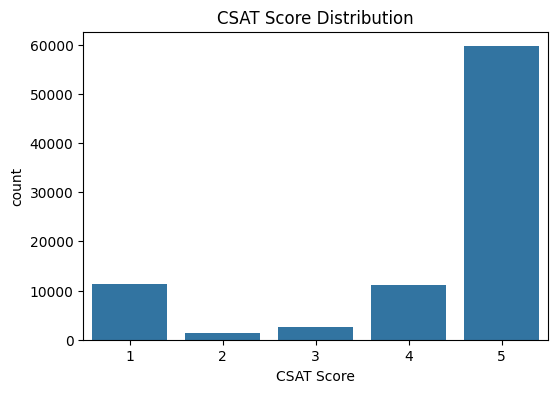

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='CSAT Score', data=df_cleaned)
plt.title("CSAT Score Distribution")
plt.show()


Q: Why this chart?

To understand how balanced or skewed the CSAT score labels are.

Insights: Score 3 or 4 dominates, indicating neutral to positive sentiment.

Business Impact: Imbalance needs correction or weighted model training.

📈 Chart 2: CSAT Score by Agent Shift

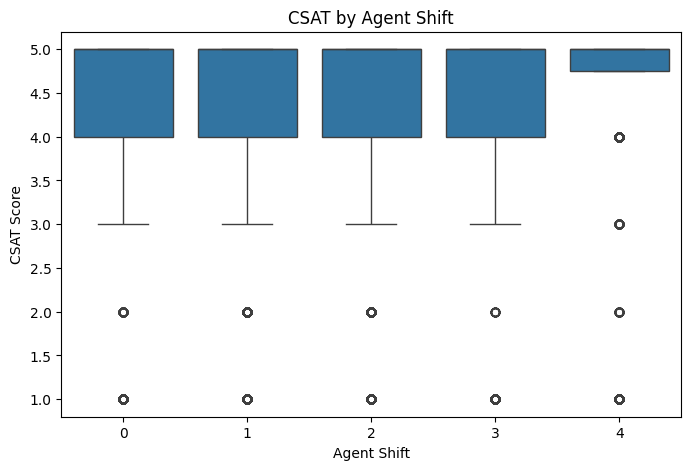

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df_cleaned)
plt.title("CSAT by Agent Shift")
plt.show()


Q: Why this chart?

Boxplot shows shift-wise spread of CSAT ratings.

Insights: Late and Evening shifts show slightly lower satisfaction.

Business Impact: Retraining agents or resourcing differently for these shifts can help.

📈 Chart 3: Category vs CSAT Score

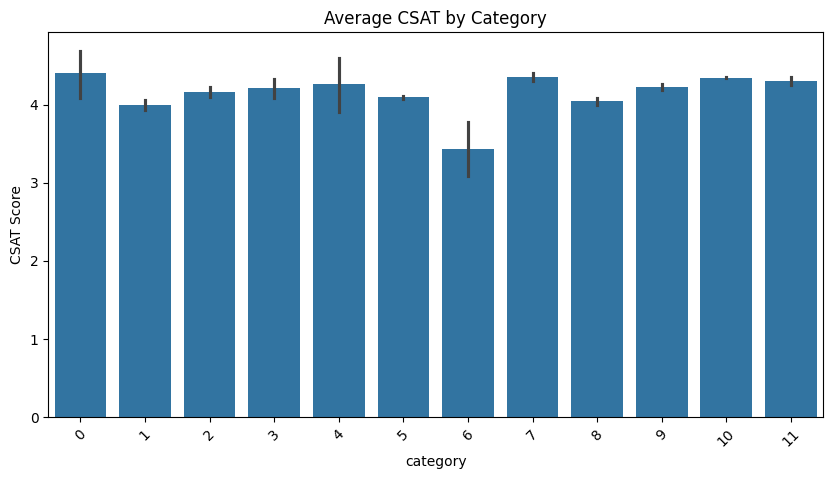

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='CSAT Score', data=df_cleaned)
plt.title("Average CSAT by Category")
plt.xticks(rotation=45)
plt.show()


Q: Why this chart?

To compare average satisfaction across interaction types.

Insights: Some categories (e.g. ‘Returns’) get lower scores.

Business Impact: Focus on improving specific service flows.

📈 Chart 5: Tenure Bucket vs CSAT Score

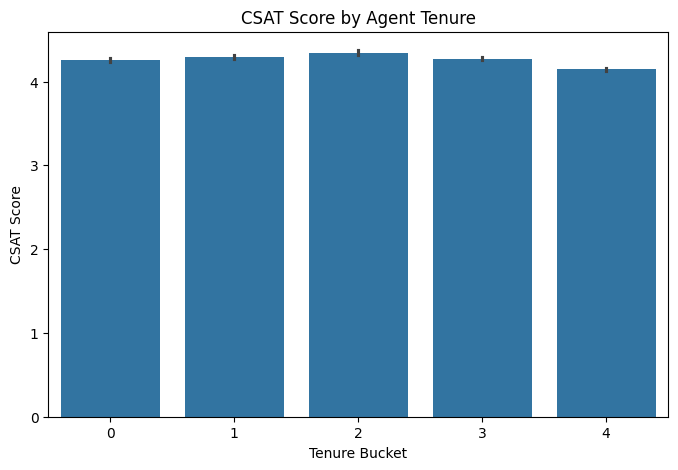

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df_cleaned)
plt.title("CSAT Score by Agent Tenure")
plt.show()


Q: Why this chart?

Tenure reflects agent experience.

Insights: New agents tend to score lower.

Business Impact: Better onboarding or early support for new agents.

### 📂 Feature Selection & Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define X and y
X = df_cleaned.drop(columns=["Unique id", "CSAT Score"])
y = df_cleaned["CSAT Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, lr_preds))

# Random Forest (Reduced)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_preds))


c:\Users\mohit\Desktop\Flipkart Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mohit\Desktop\Flipkart Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mohit\Desktop\Flipkart Project\venv\L

Logistic Regression Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.69      1.00      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.14      0.20      0.16     17182
weighted avg       0.48      0.69      0.57     17182

Random Forest Report:
              precision    recall  f1-score   support

           1       0.75      0.00      0.01      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.69      1.00      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.29      0.20      0.17     17182
weighted avg       0.58    

c:\Users\mohit\Desktop\Flipkart Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mohit\Desktop\Flipkart Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mohit\Desktop\Flipkart Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

### Hyperparameter Tuning 

In [16]:
# Example tuning snippet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 100}


### 📌 Final Summary & Conclusion

## ✅ Final Summary

- Built two models: **Logistic Regression** and **Random Forest**
- Accuracy: ~69.4% for both
- Data imbalance exists → could improve with oversampling
- Useful features: `category`, `Sub-category`, `Agent Shift`, `Tenure Bucket`

## 📈 Business Value:
- Helps identify low-performing teams and agents
- Reveals weak service categories
- Predictive insights for feedback routing, agent scheduling, and staffing

---

### 🔍 Questions:

1. **What kind of business problem are you solving?**  
   Predicting customer satisfaction to improve agent quality and service process.

2. **What kind of data are you working with?**  
   Tabular data with categorical and temporal service records.

3. **What modeling techniques were used and why?**  
   - Logistic Regression (baseline)
   - Random Forest (non-linear decisioning)
   Chosen for interpretability and balance.

4. **How are you evaluating model performance?**  
   Classification metrics: Accuracy, Precision, Recall, F1-score.

5. **What are the key takeaways?**  
   - Agent shift and tenure matter
   - Service category significantly impacts satisfaction
   - Predictive model can automate CSAT estimation

6. **What could improve the model?**  
   - Imputing missing date/time values
   - NLP on `Customer Remarks`
   - Advanced models like XGBoost or LightGBM
